**Zadanie 1**  
1. Wczytaj pliki danych i scal je w jedną ramkę DataFrame.
2. Wykonaj analizę typów danych podobnie jak w przykładach.
3. Zmierz wielkość pamięci RAM ramki z domyślnymi typami danych.

In [1]:
import os
import time

import pandas as pd

files = [[f"data\\{f}"] for f in os.listdir("data") if f.endswith(".parquet")]

df = pd.DataFrame()
for f in files:
    path = os.path.join("..", "L1", f[0])
    df = pd.concat([df, pd.read_parquet(path, engine='fastparquet')])

df

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
0,28370919,3496776,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @i...,80,0,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,travel_&_adventure
1,13623950,3496776,BeyPed5hKj9,2237947779,2018-02-04 19:35:20,1,The dirty south was prime today. Top day with ...,86,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
2,28370905,3496776,Bunhd1DFVAG,2237947779,2019-03-05 08:03:11,1,Tech Tuesday. Been flat out on the tools. Got ...,168,3,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,science_&_technology
3,28370907,3496776,Bppi85gliQK,2237947779,2018-11-01 20:17:41,1,"On the tools, my favourite wheel builds @stans...",102,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
4,32170690,3496776,BuDfIyslzfw,2237947779,2019-02-19 08:10:11,1,Solid effort on the bar turn.\nFully turned.\n...,145,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147353,43194861,4492285,Bw6NjgYH9VF,3198207653,2019-05-01 08:17:33,1,Beijing has nice days too,151,3,zarazhangg,Harvard grad from China working in tech 🇨🇳🇸🇬🇯🇵...,1801,1428,249,False,en,diaries_&_daily_life
1147354,43194863,4492285,Bwossrynm05,3198207653,2019-04-24 13:03:22,1,Breaded,149,2,zarazhangg,Harvard grad from China working in tech 🇨🇳🇸🇬🇯🇵...,1801,1428,249,False,en,food_&_dining
1147355,43194867,4492285,Bvx0jgoHk8h,3198207653,2019-04-03 05:33:47,1,A taste of Tokyo in Beijing 🍱 #waimai,74,1,zarazhangg,Harvard grad from China working in tech 🇨🇳🇸🇬🇯🇵...,1801,1428,249,False,en,travel_&_adventure
1147356,43194869,4492285,BtkHy1fnH2n,3198207653,2019-02-07 03:49:45,1,"When it’s -23 degrees, eat ice cream ☃️🍦",111,6,zarazhangg,Harvard grad from China working in tech 🇨🇳🇸🇬🇯🇵...,1801,1428,249,False,en,food_&_dining


In [2]:
df.dtypes

sid                     int64
sid_profile             int64
post_id                object
profile_id              int64
date                   object
post_type               int64
description            object
likes                   int64
comments                int64
username               object
bio                    object
following               int64
followers               int64
num_posts               int64
is_business_account      bool
lang                   object
category               object
dtype: object

In [3]:
df1_memory = df.memory_usage(deep=True)
df1_memory

Index                    55073184
sid                      55073184
sid_profile              55073184
post_id                 468070228
profile_id               55073184
date                    523195248
post_type                55073184
description            3664822457
likes                    55073184
comments                 55073184
username                479883093
bio                    1863561713
following                55073184
followers                55073184
num_posts                55073184
is_business_account       6884148
lang                    406164732
category                508581645
dtype: int64

In [4]:
sum(df.memory_usage(deep=True))

8471895104

**Zadanie 2**  
Dobierz bardziej optymalne typy danych i ponownie zmierz wielkość zajmowanej pamięci RAM.
Porównaj obie wielkości na wykresie (wybierz pasujący typ wykresu).

In [5]:
pd.options.display.float_format = '{:.5f}'.format
desc = df.describe()
desc

,sid,sid_profile,profile_id,post_type,likes,comments,following,followers,num_posts
count,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000,6884148.00000
mean,29558500.80795,3457955.52530,2547560155.32008,1.01382,384.63353,8.16274,1081.43728,19077.30757,857.96042
std,12816867.54420,1022692.84116,3229435999.72386,0.11679,6774.44149,140.75957,2615.01166,681331.31529,1987.41543
min,6025.00000,-1.00000,4.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,17093229.50000,3314935.00000,209447488.00000,1.00000,20.00000,0.00000,306.00000,302.00000,111.00000
50%,37450453.50000,3760938.00000,1099984196.00000,1.00000,46.00000,2.00000,657.00000,745.00000,330.00000
75%,40279382.25000,4087801.00000,4069290253.00000,1.00000,123.00000,5.00000,1204.00000,1764.00000,886.00000
max,43330548.00000,4510785.00000,15666951479.00000,3.00000,3311246.00000,173988.00000,1190947.00000,285457645.00000,183730.00000


In [6]:
import numpy as np

print(np.iinfo(np.int8).max)
print(np.iinfo(np.int16).max)
print(np.iinfo(np.int32).max)
print(np.iinfo(np.int64).max)

127
32767
2147483647
9223372036854775807


In [7]:
df2 = df.copy()
df2['category'] = df['category'].astype('category')
df2['lang'] = df['lang'].astype('category')
df2['post_type'] = df['post_type'].astype('category')
df2['date'] = pd.to_datetime(df['date'])
df2['sid'] = df['sid'].astype('int32')
df2['sid_profile'] = df['sid_profile'].astype('int32')
df2['likes'] = df['likes'].astype('int32')
df2['comments'] = df['comments'].astype('int32')
df2['following'] = df['following'].astype('int32')
df2['followers'] = df['followers'].astype('int32')
df2['num_posts'] = df['num_posts'].astype('int32')

In [8]:
df2.dtypes

sid                             int32
sid_profile                     int32
post_id                        object
profile_id                      int64
date                   datetime64[ns]
post_type                    category
description                    object
likes                           int32
comments                        int32
username                       object
bio                            object
following                       int32
followers                       int32
num_posts                       int32
is_business_account              bool
lang                         category
category                     category
dtype: object

In [9]:
df2_memory = df2.memory_usage(deep=True)
df2_memory

Index                    55073184
sid                      27536592
sid_profile              27536592
post_id                 468070228
profile_id               55073184
date                     55073184
post_type                 6884280
description            3664822457
likes                    27536592
comments                 27536592
username                479883093
bio                    1863561713
following                27536592
followers                27536592
num_posts                27536592
is_business_account       6884148
lang                      6884315
category                  6886077
dtype: int64

In [10]:
sum(df2.memory_usage(deep=True))

6861852007

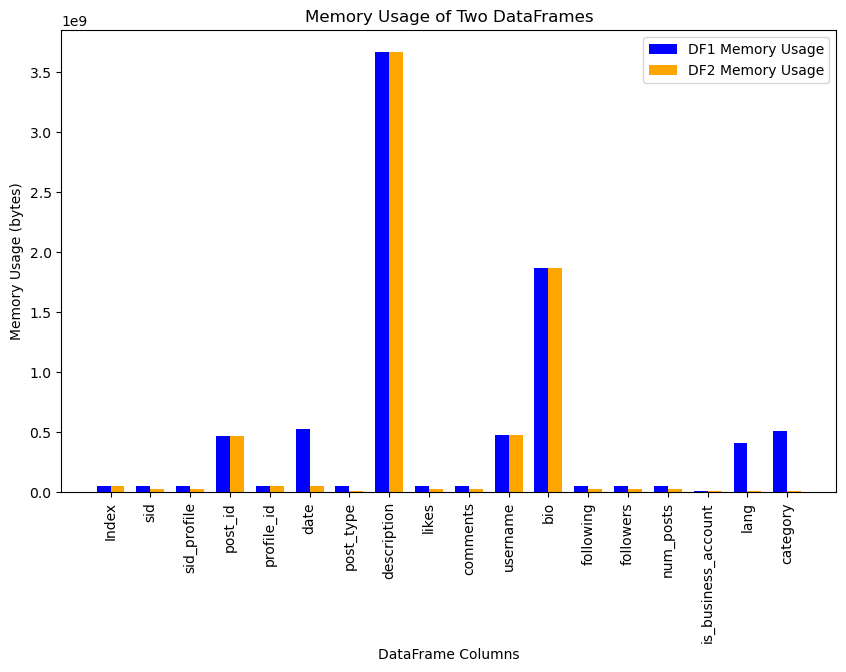

In [11]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the bar width
bar_width = 0.35

# Set the index for the x-axis
index = range(len(df1_memory))

# Plot the memory usage for the first DataFrame
plt.bar(index, df1_memory, width=bar_width, label='DF1 Memory Usage', color='blue')

# Plot the memory usage for the second DataFrame, offsetting the x position
plt.bar([i + bar_width for i in index], df2_memory, width=bar_width, label='DF2 Memory Usage', color='orange')

# Adding titles and labels
plt.title('Memory Usage of Two DataFrames')
plt.xlabel('DataFrame Columns')
plt.ylabel('Memory Usage (bytes)')

# Set the x-ticks to the center of the grouped bars
plt.xticks([i + bar_width / 2 for i in index], df1_memory.index, rotation=90)

# Show legend
plt.legend()

# Display the plot
plt.show()

**Zadanie 3**  
Wykonaj 3 wybrane operacje (grupowanie + agregacja, filtrowanie, itp.) na całej ramce i zmierz czas wykonania na danych oryginalnych i zoptymalizowanych.
Wyświetl te czasy.

In [12]:
from datetime import datetime

print("grouping")
start = datetime.now()
df.groupby('username').count()
print(f'stop: {datetime.now() - start}')
start = datetime.now()
df2.groupby('username').count()
print(f'stop: {datetime.now() - start}')

grouping
stop: 0:00:03.336691
stop: 0:00:02.773178


In [13]:
print("filtering")
start = datetime.now()
df[df['post_type'] == 1]
print(f'stop: {datetime.now() - start}')
start = datetime.now()
df2[df2['post_type'] == 1]
print(f'stop: {datetime.now() - start}')

filtering
stop: 0:00:01.399999
stop: 0:00:01.156196


In [14]:
print("aggregation")
start = datetime.now()
df.groupby('username').agg({'post_type': 'count', 'likes': 'max'}).reset_index()
print(f'stop: {datetime.now() - start}')
start = datetime.now()
df2.groupby('username').agg({'post_type': 'count', 'likes': 'max'}).reset_index()
print(f'stop: {datetime.now() - start}')

aggregation
stop: 0:00:01.909499
stop: 0:00:01.871333


**Zadanie 4**  
Zapisz ramkę jako plik csv, z nagłówkami kolumn, bez indeksu.
Sprawdź jaka jest różnica w wielkości pliku csv i sumy wielkości plików w formacie parquet (w eksploratorze, nie trzeba tego robić z poziomu kodu).

In [15]:
df.to_csv('df1.csv', index=False)

In [16]:
df2.to_csv('df2.csv', index=False)

parquet paczki: 0,99 GB
ramka bez optymalizacji: 2,44 GB
ramka z optymalizacją: 2,44 GB

**Zadanie 5**  
Zmierz czas wczytywania danych z pliku csv dla 3 przypadków:
* cały plik na raz,
* cały plik ze wskazaniem parametru `chunksize` (możesz poeksperymentować z wielkością tego parametru),
* z użyciem multiprocessingu zaprezentowanego w przykładzie (wcześniej podziel plik na kilka mniejszych), wskazując ilość procesów jako `ilość_rdzeni - 2` oraz drugi przypadek `(ilosc_rdzeni - 2) * 2`.

#### cały plik na raz,

In [17]:
start = datetime.now()
df = pd.read_csv('df2.csv', header=1)
print(f'stop: {datetime.now() - start}')
df.head()

stop: 0:00:48.912225


,28370919,3496776,BXdjjUlgcgq,2237947779,2017-08-06 20:06:57,2,Wreckloose! Deevalley bike park laps on the @intensecycles recluse!\n@alfjonescycles \n@saddleback_ltd \n#deevalleybikepark #northwalestrails #ridemoremtb #recluse #bikes #cycling #mtb #bikepark #gopro,80,0,andylund_,"Professional Bicycle technician, Intense Racing UK, Dee valley bicycle workshop, living the north wales dream. \nClick here ⬇️⬇️⬇️",520,1204,494,False,en,travel_&_adventure
0,13623950,3496776,BeyPed5hKj9,2237947779,2018-02-04 19:35:20,1,The dirty south was prime today. Top day with ...,86,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
1,28370905,3496776,Bunhd1DFVAG,2237947779,2019-03-05 08:03:11,1,Tech Tuesday. Been flat out on the tools. Got ...,168,3,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,science_&_technology
2,28370907,3496776,Bppi85gliQK,2237947779,2018-11-01 20:17:41,1,"On the tools, my favourite wheel builds @stans...",102,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
3,32170690,3496776,BuDfIyslzfw,2237947779,2019-02-19 08:10:11,1,Solid effort on the bar turn.\nFully turned.\n...,145,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,diaries_&_daily_life
4,14315358,3496776,BxJsMDpA2yH,2237947779,2019-05-07 08:33:51,1,Annual springtime flora picture.\nTurn bars in...,124,2,andylund_,"Professional Bicycle technician, Intense Racin...",520,1204,494,False,en,arts_&_culture


#### cały plik ze wskazaniem parametru `chunksize` (możesz poeksperymentować z wielkością tego parametru),

In [18]:
start = datetime.now()
chunks = pd.read_csv('df2.csv', header=1, chunksize=8_000_000)
print(f'stop: {datetime.now() - start}')

stop: 0:00:00.014002


In [19]:
start = datetime.now()
chunks = pd.read_csv('df2.csv', header=1, chunksize=4_000_000)
print(f'stop: {datetime.now() - start}')

stop: 0:00:00.009500


In [20]:
start = datetime.now()
chunks = pd.read_csv('df2.csv', header=1, chunksize=1_000_000)
print(f'stop: {datetime.now() - start}')

stop: 0:00:00.005872


multiprocesing w oddzielnym pliku